# Table of Contents

* Model Development Data
    * Raw Data 
    
    * Data Analysis
        * Descriptive Analysis
        * Check Duplicates and Abnormalities
        * Visualize Discrete Features
        * Visualize Continuous Features
        * Colinearity Check of Independent Variables
        
    * Data Pre-Processing
        * Scaling of Independent Variables
        
        
* Model Development
    * Linear Regression
        * Feature Selection
        * Model Training
        * Model Testing
    
    * Time Series Modeling on Each Independent Variables


* Model Validation
    * K-Fold Cross Validation


* Model Results & Presentation

In [1]:
import pandas as pd
import numpy as np

In [2]:
td=pd.read_csv(r'~/Project/project-main/data/Australia/d/totaldemand_vic.csv')
temp=pd.read_csv(r'~/Project/project-main/data/Australia/d/temprature_vic.csv')

## Create a Master Table

In [3]:
td

,DATETIME,TOTALDEMAND,REGIONID
0,2010-01-01 00:00:00,5426.12,VIC1
1,2010-01-01 00:30:00,5111.02,VIC1
2,2010-01-01 01:00:00,4960.03,VIC1
3,2010-01-01 01:30:00,5283.40,VIC1
4,2010-01-01 02:00:00,5046.15,VIC1
...,...,...,...
196508,2021-03-17 22:00:00,4557.56,VIC1
196509,2021-03-17 22:30:00,4485.95,VIC1
196510,2021-03-17 23:00:00,4434.62,VIC1
196511,2021-03-17 23:30:00,4660.85,VIC1


In [4]:
#Region column only has one value
print(td.groupby('REGIONID').size().reset_index(name='Count'))

  REGIONID   Count
0     VIC1  196513


In [5]:
temp

,LOCATION,DATETIME,TEMPERATURE
0,Melbourne (Olympic Park),31/05/2013 15:00,18.2
1,Melbourne (Olympic Park),31/05/2013 15:30,18.3
2,Melbourne (Olympic Park),31/05/2013 16:00,18.3
3,Melbourne (Olympic Park),31/05/2013 16:30,18.3
4,Melbourne (Olympic Park),31/05/2013 17:00,18.2
...,...,...,...
141676,Melbourne (Olympic Park),17/03/2021 22:00,18.9
141677,Melbourne (Olympic Park),17/03/2021 22:30,17.9
141678,Melbourne (Olympic Park),17/03/2021 23:00,17.3
141679,Melbourne (Olympic Park),17/03/2021 23:30,16.6


In [6]:
# location column only has one value
print(temp.groupby('LOCATION').size().reset_index(name='Count'))

                   LOCATION   Count
0  Melbourne (Olympic Park)  141681


In [7]:
# aggregate at daily basis and calculate the average electricity total demand 
td['DATETIME']=pd.to_datetime(td['DATETIME'])
td.set_index('DATETIME',inplace=True)
td_daily=td.resample('D').mean()
print(td_daily)

            TOTALDEMAND
DATETIME               
2010-01-01  4997.990208
2010-01-02  4628.301458
2010-01-03  4686.432500
2010-01-04  5516.236042
2010-01-05  5735.790417
...                 ...
2021-03-14  3899.084167
2021-03-15  4721.752917
2021-03-16  4675.094167
2021-03-17  4759.065833
2021-03-18  4608.850000

[4095 rows x 1 columns]


In [8]:
# aggregate at daily basis and calculate the average Temp
temp['DATETIME']=pd.to_datetime(temp['DATETIME'])
temp.set_index('DATETIME',inplace=True)
temp_daily=temp.resample('D').mean()
print(temp_daily)

            TEMPERATURE
DATETIME               
2013-01-06    14.216667
2013-01-07    14.481250
2013-01-08    10.035417
2013-01-09    19.105263
2013-01-10    15.741818
...                 ...
2021-11-29          NaN
2021-11-30          NaN
2021-12-01    19.172917
2021-12-02    19.883673
2021-12-03    22.573077

[3254 rows x 1 columns]


In [9]:
type(temp_daily)

pandas.core.frame.DataFrame

In [10]:
df=pd.merge(td_daily,temp_daily,on='DATETIME',how='inner')

In [11]:
# need to remove NaN values. otherwise will get an error message in regression
df=df.dropna()

In [12]:
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

In [13]:
df

,TOTALDEMAND,TEMPERATURE
DATETIME,,
2013-01-06,4834.045000,14.216667
2013-01-07,6209.755208,14.481250
2013-01-08,5685.655625,10.035417
2013-01-09,5085.611042,19.105263
2013-01-10,5505.109583,15.741818
2013-01-11,6036.217083,14.341667
2013-01-12,4836.313125,21.504167
2013-02-06,6539.609167,12.816667
2013-02-07,6411.036458,14.943750


In [14]:
X=df[['TEMPERATURE']]

In [15]:
y=df[['TOTALDEMAND']]

## Data Preprocessing

1. Data Scaling
2.

# Model Development

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Split training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
reg=LinearRegression()
reg.fit(X_train, y_train)
ypred=reg.predict(X_test)

In [19]:
# Get the coefficients (ratios) of the features
coefficients = reg.coef_

# Print the coefficients
print("Coefficients (Ratios) of Features:")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

Coefficients (Ratios) of Features:
TEMPERATURE: [-7.24253984]


In [20]:
# Print the intercept
print("Intercept of the Fitted Model:", reg.intercept_)

Intercept of the Fitted Model: [5168.36259654]


Electricity Demand=-7.24253984 * Temperature +5168.36259454

In [21]:
y_test['ypred']=ypred

In [22]:
y_test

,TOTALDEMAND,ypred
DATETIME,,
2016-05-26,5711.703125,5087.911997
2020-04-14,4493.742917,5040.939161
2017-06-13,5632.706250,5088.407974
2017-05-07,4476.002917,5082.176372
2016-06-09,5535.804375,5062.108502
2014-01-25,4618.228333,5045.676989
2017-02-25,3960.287708,5045.450660
2017-04-07,4590.001042,5076.249314
2018-07-06,5176.771667,5059.233041


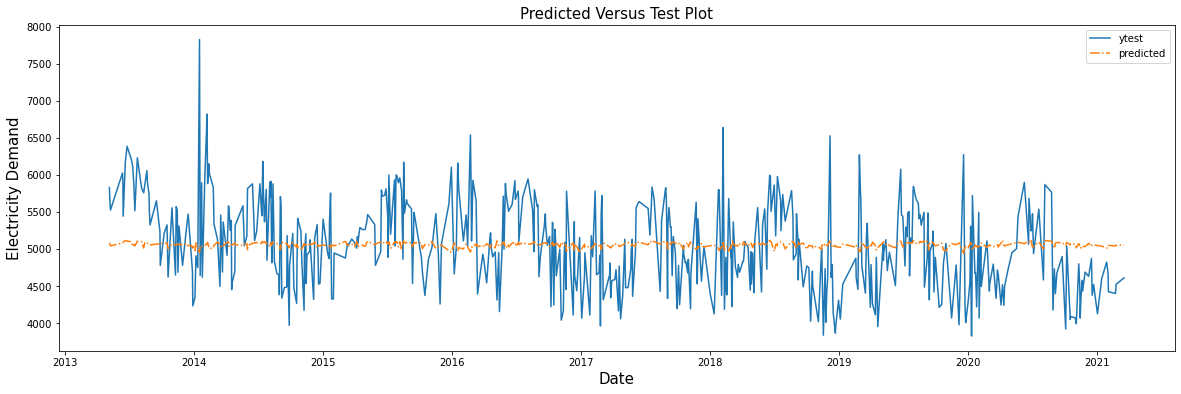

In [23]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=y_test, x='DATETIME', y='TOTALDEMAND', label="ytest")
sns.lineplot(data=y_test, x='DATETIME', y="ypred", linestyle= 'dashdot', label="predicted")
plt.title("Predicted Versus Test Plot", fontsize=15)
plt.ylabel('Electricity Demand', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.legend()
plt.show()

### Model Testing

### Model Validation 

## Forecast Temperature Using Time Series Model (ARIMA Model)

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
# Split the data into training and testing sets 
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Fit ARIMA model to training data
model = ARIMA(train_data['TEMPERATURE'], order=(4, 1, 2))  # Need to fine-tune the best Autogressive component p, Integrated Component d, Moving Average Component q
results = model.fit()

# Forecast future electricity usage
forecast_horizon = 10  # forecast horizon (10 days)
forecast = results.forecast(steps=forecast_horizon)

/Users/william/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/william/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/william/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/william/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  war

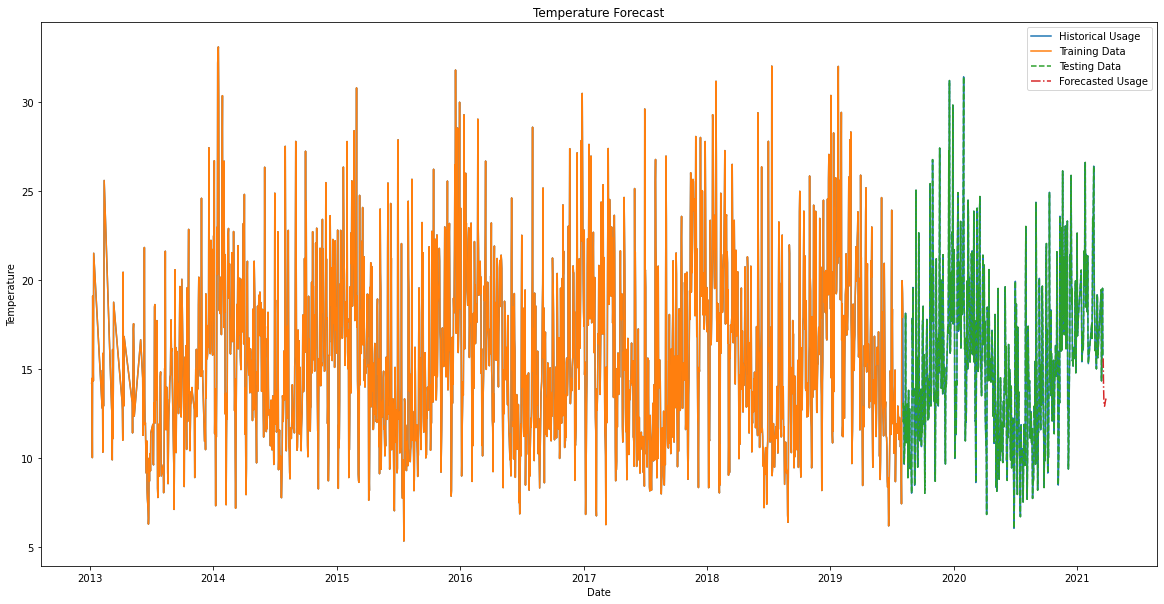

In [26]:
# Plot historical data, training data, and forecasted values
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['TEMPERATURE'], label='Historical Usage')
plt.plot(train_data.index, train_data['TEMPERATURE'], label='Training Data')
plt.plot(test_data.index, test_data['TEMPERATURE'], label='Testing Data', linestyle='--')
plt.plot(pd.date_range(start=test_data.index[-1], periods=forecast_horizon+1, freq='D')[1:], forecast, label='Forecasted Usage', linestyle='-.')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Forecast')
plt.legend()
plt.show()

In [27]:
# Forecast temperature in 10 days
forecast 

2257    15.607230
2258    14.150618
2259    13.315977
2260    12.959117
2261    12.919163
2262    13.016031
2263    13.143920
2264    13.250028
2265    13.317607
2266    13.350554
Name: predicted_mean, dtype: float64

# Forecasting

Take the forecast temperature data and plug into the linear regression model. 